## Table of Contents

### 1. Image Classification using pretrained DL model
> #### 1.1 Define deep learning model 
> #### 1.2 Preprocess data
> #### 1.3 Get prediction

---

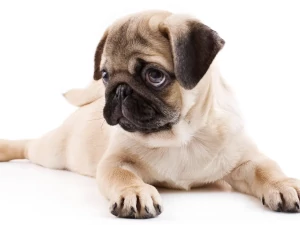

### <-------------This is a Dog------------->

### 1.1 Define deep learning model

In [1]:
# import required modules
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# import pytorch related modules
import torch
from torchvision import transforms
from torchvision.models import densenet121

In [2]:
# define pretrained DL model
model = densenet121(pretrained=True)

model.eval();

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


### 1.2 Preprocess data

**Note - Upload dog.jpg image on Colab**

In [3]:
# set image path
filename='dog.jpg'

In [4]:
# load image using PIL
input_image = Image.open(filename)

# preprocess image according to the pretrained model
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)

# create a mini-batch as expected by the model
input_batch = input_tensor.unsqueeze(0) 

# pass input batch to the model
with torch.no_grad():
    output = model(input_batch)

### 1.3 Get prediction

In [5]:
# get prediction by applying softmax

pred = torch.nn.functional.softmax(output[0], dim=0).cpu().numpy()
np.argmax(pred)

254

In [6]:
# download classes on which the model was trained on 
!wget https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json

--2021-03-01 08:27:31--  https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.76.134
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.76.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [application/octet-stream]
Saving to: ‘imagenet_class_index.json’

imagenet_class_inde 100%[===================>]  34.53K  --.-KB/s    in 0.03s   

2021-03-01 08:27:31 (1.18 MB/s) - ‘imagenet_class_index.json’ saved [35363/35363]



In [7]:
# load classes
with open('imagenet_class_index.json', 'r') as f:
    classes = json.load(f)

pug 54.26


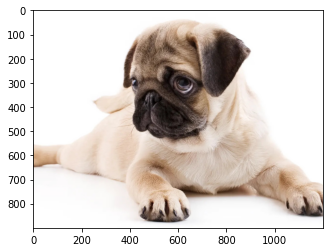

In [8]:
# show image and its class
plt.imshow(input_image)
print(classes[str(np.argmax(pred))][1], round(max(pred)*100, 2))